In [40]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


https://numpy.org/ \
https://pandas.pydata.org/ \
https://matplotlib.org/ \
https://github.com/Santigs/DS-Course


# Basic operations

In [26]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

In [27]:
purchases = pd.DataFrame(data)
purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [28]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])
purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


In [31]:
purchases.loc['Lily']

apples     0
oranges    7
Name: Lily, dtype: int64

In [32]:
purchases.iloc[2]

apples     0
oranges    7
Name: Lily, dtype: int64

# Importing data

In [ ]:
#create dataframe with data from csv local file
df = pd.read_csv("Titanic.csv")


In [ ]:
#create dataframe with data from csv raw github file
df = pd.read_csv('https://raw.githubusercontent.com/Santigs/DS-Course/main/Titanic.csv')


Dataset description
https://www.kaggle.com/c/titanic/data

# Basic dataframe information

In [37]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [38]:
df.shape

(891, 12)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.tail(10)

# Basic numerical information

In [48]:
#shows only numerical variables
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#shows non numerical variables
df.describe(include=[bool,object])

In [47]:
df.Fare.mean()

32.2042079685746

In [53]:
df[df['Survived']==1].mean()

PassengerId    444.368421
Survived         1.000000
Pclass           1.950292
Age             28.343690
SibSp            0.473684
Parch            0.464912
Fare            48.395408
dtype: float64

# Filtering

In [54]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
df[['Pclass','Sex','Age']]


In [62]:
df.iloc[:,3:6]

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0
887,"Graham, Miss. Margaret Edith",female,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,"Behr, Mr. Karl Howell",male,26.0


In [65]:
df[(df['Survived'] == 1) & (df['Pclass'] == 1)]['Age'].max()

80.0

In [66]:
df[(df['Survived'] == 0) & (df['Pclass'] == 1)]['Age'].max()

71.0

In [ ]:
df.head()

In [ ]:
classes_name = {1 : 'Class I', 2 : 'Class II', 3:'Class III'}
df_new=df.replace({'Pclass': classes_name})
df_new.head(20)

# Grouping

In [ ]:
survived_count = df.groupby('Survived')['Survived'].count()
survived_count

In [ ]:
type(survived_count)

In [ ]:
var_of_interest = ['Fare', 'Age']

df.groupby(['Survived'])[var_of_interest].agg([np.mean, np.std, np.min, np.max])

In [ ]:
#Contingency table
pd.crosstab(df['Survived'], df['Pclass'])

# Basic Charts

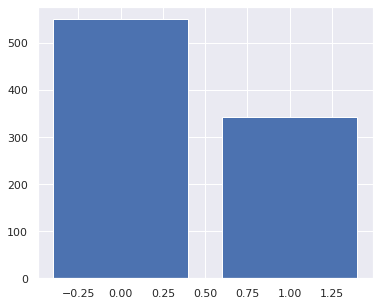

In [78]:
plt.figure(figsize=(6,5))
plt.bar(survived_count.index, survived_count.values)

plt.show()

#plt.text(1,0,'hello', horizontalalignment='center', verticalalignment='center')

In [ ]:
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived_count.values):
    plt.text(i, value-40, str(value), fontsize=18, color='white',
             horizontalalignment='center', verticalalignment='center')
    
    plt.text(1,0,'hello', horizontalalignment='center', verticalalignment='center')

plt.show()



In [ ]:
survived_sex = df.groupby('Sex')['Survived'].sum()
survived_sex

In [ ]:
import seaborn as sns; sns.set()

In [ ]:
plt.figure(figsize=(4,5))
plt.bar(survived_sex.index, survived_sex.values)
plt.title('Survived female and male')
for i, value in enumerate(survived_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

In [ ]:
pclass_count = df.groupby('Pclass')['Pclass'].count()

plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

# Create a pie chart with the embarking city distribution
Make the chart bigger\
Show the city names (hint, you can find them in kaggle)\
Bonus. Explode Cherbourg wedge and change font color

In [ ]:
pcity_count = df.groupby('Embarked')['Embarked'].count()

plt.figure(figsize=(10,10))
plt.title('Grouped by City')

myexplode = [0.2, 0, 0]
plt.pie(pcity_count.values, labels=['Cherbourg', 'Queenstown', 'Southampton'], autopct='%1.1f%%', textprops={'fontsize':15, 'color':'blue'}, explode = myexplode)
plt.show()

### Age distribution chart

In [ ]:
ages = df[df['Age'].notnull()]['Age'].values

In [ ]:
ages_hist = np.histogram(ages, bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist

(array([ 62, 102, 220, 167,  89,  48,  19,   6,   1]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))

In [ ]:
ages_hist_labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81–90']

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Age distribution')
plt.bar(ages_hist_labels, ages_hist[0])
plt.xlabel('Age')
plt.ylabel('No of passenger')
for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+5, str(int(i)), fontsize=12,
             horizontalalignment='center', verticalalignment='center')
plt.show()

Create a histogram with fare values